# Context of Dataset

This dataset has all the countries listed with their continents, GDP, population and GDP_per_capita.
We can use GDP per capita as a label and play with the dataset.
Using linear regression , is there a possibility to explore in terms of reciprocal relation between the features.

# Import Dependencies

In [1]:
import os
import sys
import warnings
import matplotlib
import pandas
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load Data

In [2]:
df = pd.read_csv("countries.csv")

In [3]:
df.head()

,Rank,ID,Country,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,1,840,United States,North America,339996.56,2.669515e+13,1.862448e+13,78515.94
1,2,156,China,Asia,1425671.35,2.186548e+13,1.121828e+13,15336.97
2,3,392,Japan,Asia,123294.51,5.291351e+12,4.936212e+12,42916.35
3,4,276,Germany,Europe,83294.63,4.564778e+12,3.477796e+12,54802.79
4,5,356,India,Asia,1428627.66,3.893670e+12,2.259642e+12,2725.46


In [4]:
df.tail()

,Rank,ID,Country,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
207,208,729,Sudan,Africa,48109.01,0.0,8.288740e+10,1722.91
208,209,760,Syria,Asia,23227.01,0.0,2.216308e+10,954.19
209,210,788,Tunisia,Africa,12458.22,0.0,4.170356e+10,3347.47
210,211,796,Turks and Caicos Islands,North America,46.06,0.0,9.175505e+08,19919.90
211,212,804,Ukraine,Europe,36744.63,0.0,9.327035e+10,2538.34


In [5]:
df.drop(df.columns[[1,3]],axis=1, inplace=True)

In [6]:
df.head()

,Rank,Country,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,1,United States,339996.56,2.669515e+13,1.862448e+13,78515.94
1,2,China,1425671.35,2.186548e+13,1.121828e+13,15336.97
2,3,Japan,123294.51,5.291351e+12,4.936212e+12,42916.35
3,4,Germany,83294.63,4.564778e+12,3.477796e+12,54802.79
4,5,India,1428627.66,3.893670e+12,2.259642e+12,2725.46


In [7]:
df.columns

Index(['Rank', 'Country', 'Population', 'IMF_GDP', 'UN_GDP', 'GDP_per_capita'], dtype='object')

In [8]:
df.shape

(212, 6)

In [9]:
df.isnull().sum()

Rank              0
Country           0
Population        0
IMF_GDP           0
UN_GDP            0
GDP_per_capita    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            212 non-null    int64  
 1   Country         212 non-null    object 
 2   Population      212 non-null    float64
 3   IMF_GDP         212 non-null    float64
 4   UN_GDP          212 non-null    float64
 5   GDP_per_capita  212 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.1+ KB


In [12]:
df.describe()

,Rank,Population,IMF_GDP,UN_GDP,GDP_per_capita
count,212.000000,2.120000e+02,2.120000e+02,2.120000e+02,212.000000
mean,106.500000,3.793169e+04,5.213021e+11,3.541058e+11,19669.115472
std,61.343296,1.439021e+05,2.448664e+12,1.576706e+12,28036.352685
min,1.000000,4.390000e+00,0.000000e+00,0.000000e+00,278.430000
25%,53.750000,1.247810e+03,2.880000e+09,4.638538e+09,2484.200000
50%,106.500000,6.967350e+03,2.951600e+10,2.128999e+10,7481.425000
75%,159.250000,2.756395e+04,2.265350e+11,1.592921e+11,23997.432500
max,212.000000,1.428628e+06,2.669515e+13,1.862448e+13,178196.570000


In [13]:
df.corr()

,Rank,Population,IMF_GDP,UN_GDP,GDP_per_capita
Rank,1.000000,-0.294484,-0.328143,-0.337675,-0.224541
Population,-0.294484,1.000000,0.616048,0.541955,-0.055079
IMF_GDP,-0.328143,0.616048,1.000000,0.985585,0.169886
UN_GDP,-0.337675,0.541955,0.985585,1.000000,0.189496
GDP_per_capita,-0.224541,-0.055079,0.169886,0.189496,1.000000


# EDA(Exploratory Data Analysis)
## Data Visualization

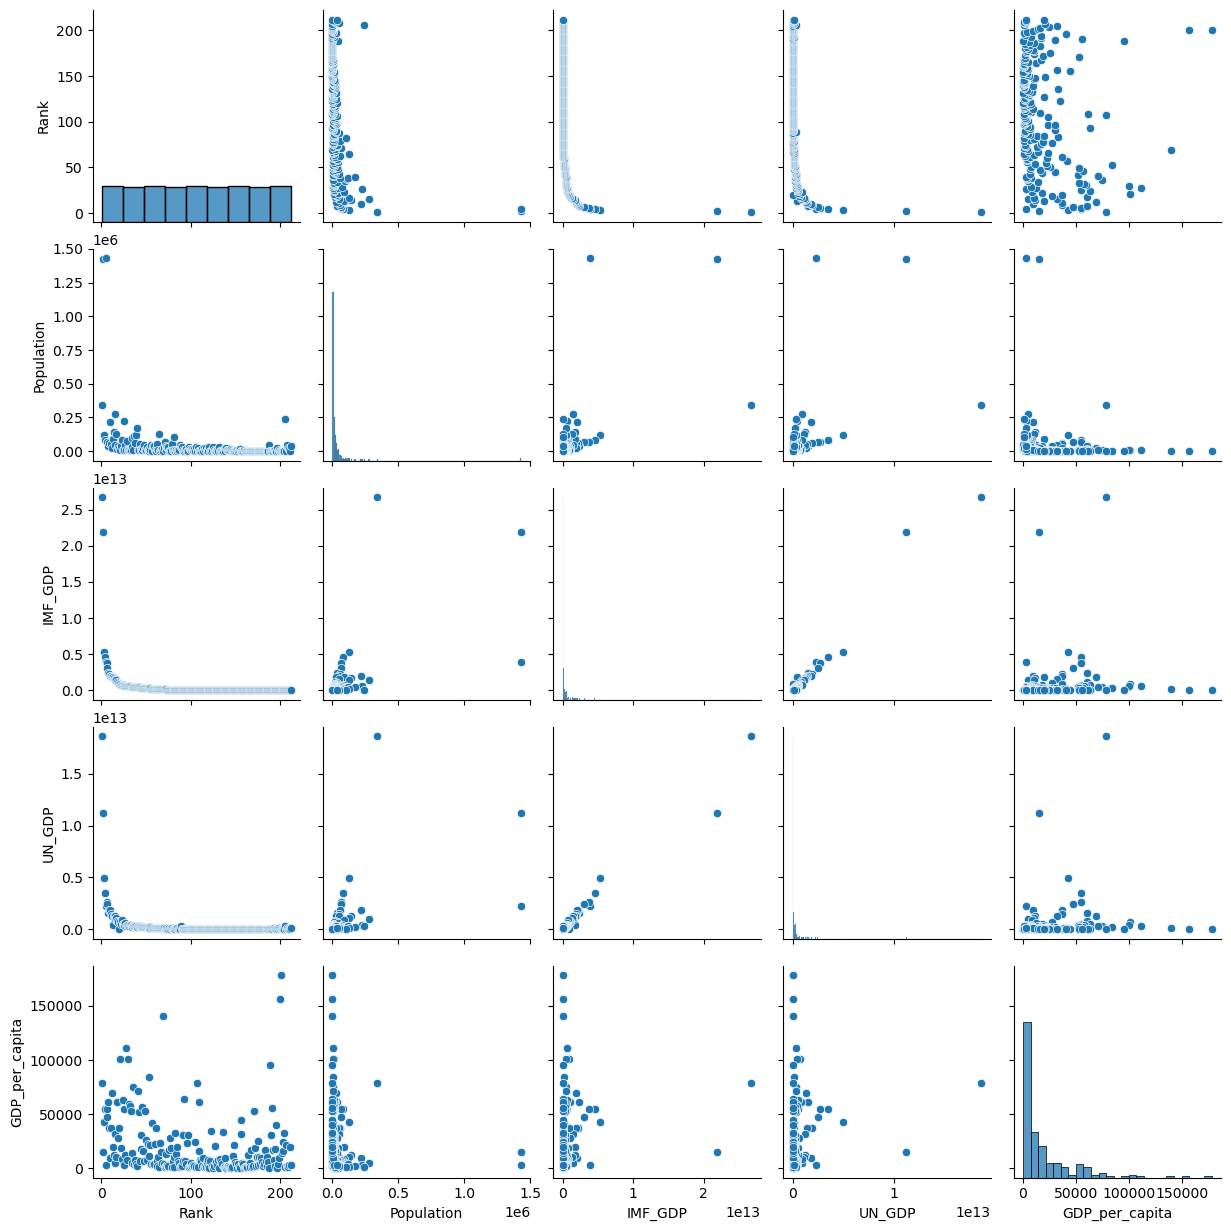

In [14]:
sns.pairplot(df)

<AxesSubplot: >

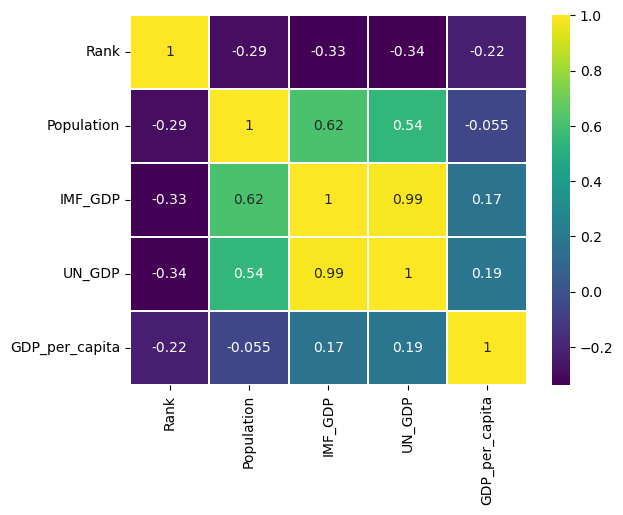

In [15]:
sns.heatmap(df.corr(),cmap = 'viridis',annot= True,linewidths=0.15)

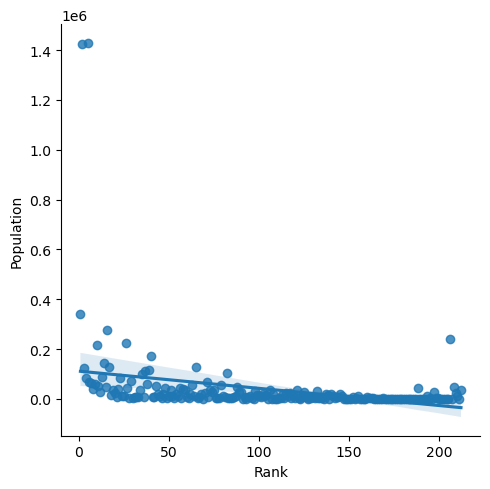

In [16]:
sns.lmplot(x = 'Rank', y = 'Population',data = df)

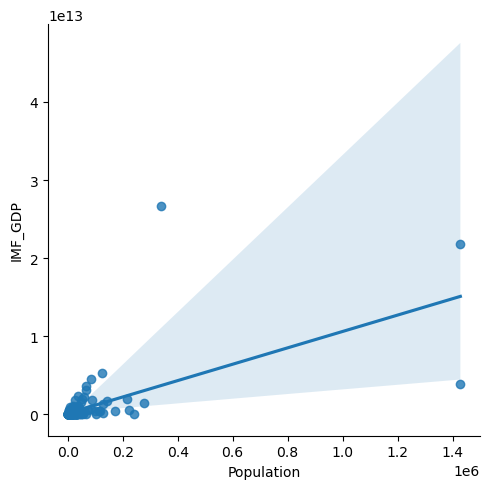

In [17]:
sns.lmplot(x= 'Population', y = 'IMF_GDP',data = df)

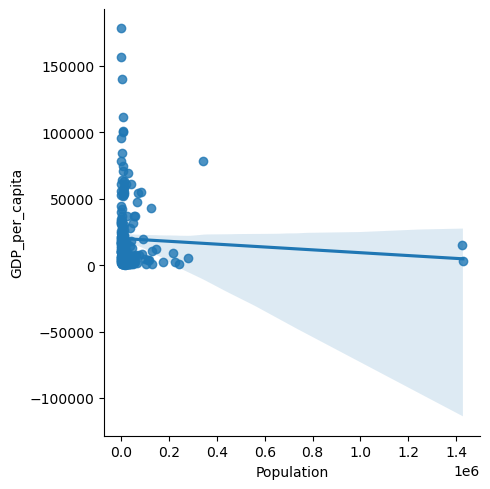

In [18]:
sns.lmplot(x = 'Population', y = 'GDP_per_capita',data =df)

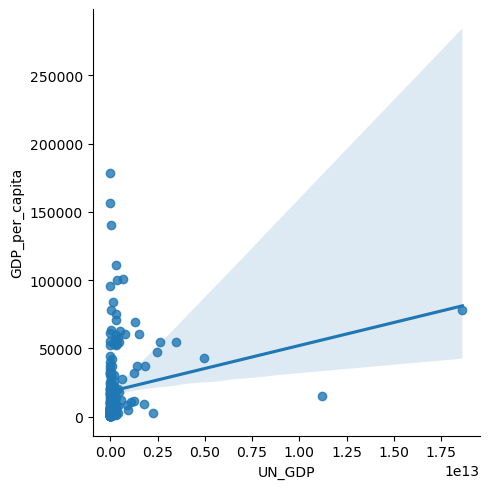

In [19]:
sns.lmplot(x = 'UN_GDP',y = 'GDP_per_capita',data =df)

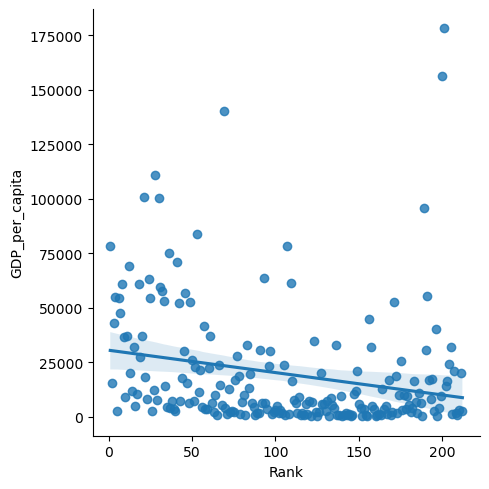

In [20]:
sns.lmplot(x = 'Rank', y = 'GDP_per_capita',data = df)

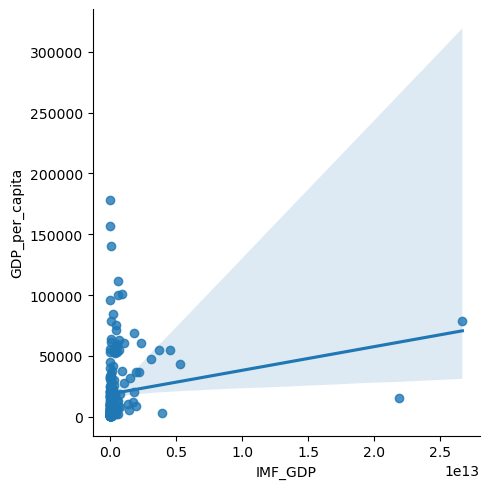

In [21]:
sns.lmplot(x = 'IMF_GDP',y = 'GDP_per_capita',data =df)

## Feature Engineering

In [22]:
df['Population'] = df['Population'] * 1000
df['GDP_Overall']=(df['IMF_GDP']/df['Population'])
df.head()

,Rank,Country,Population,IMF_GDP,UN_GDP,GDP_per_capita,GDP_Overall
0,1,United States,3.399966e+08,2.669515e+13,1.862448e+13,78515.94,78515.941455
1,2,China,1.425671e+09,2.186548e+13,1.121828e+13,15336.97,15336.972297
2,3,Japan,1.232945e+08,5.291351e+12,4.936212e+12,42916.35,42916.355319
3,4,Germany,8.329463e+07,4.564778e+12,3.477796e+12,54802.79,54802.788607
4,5,India,1.428628e+09,3.893670e+12,2.259642e+12,2725.46,2725.461720


<AxesSubplot: >

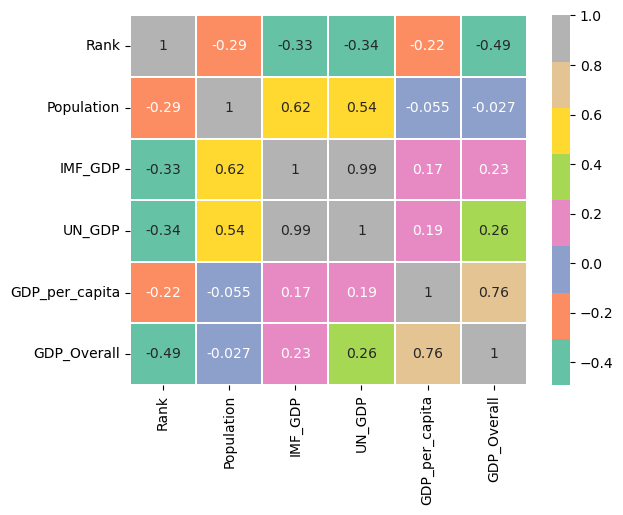

In [23]:
sns.heatmap(df.corr(),annot =True, cmap = 'Set2',linewidths=0.12)

## Pre-processing 

In [24]:
from sklearn.preprocessing import OneHotEncoder
df_cat = df[['Country']]
cat_encoder = OneHotEncoder()
df_cat_1 = cat_encoder.fit_transform(df_cat)

In [25]:
df_cat_1 = df_cat_1.toarray()

In [26]:
cols = cat_encoder.categories_

In [27]:
cat = pd.DataFrame(df_cat_1, columns=cols)

In [28]:
cat.shape

(212, 212)

In [29]:
df.head()

,Rank,Country,Population,IMF_GDP,UN_GDP,GDP_per_capita,GDP_Overall
0,1,United States,3.399966e+08,2.669515e+13,1.862448e+13,78515.94,78515.941455
1,2,China,1.425671e+09,2.186548e+13,1.121828e+13,15336.97,15336.972297
2,3,Japan,1.232945e+08,5.291351e+12,4.936212e+12,42916.35,42916.355319
3,4,Germany,8.329463e+07,4.564778e+12,3.477796e+12,54802.79,54802.788607
4,5,India,1.428628e+09,3.893670e+12,2.259642e+12,2725.46,2725.461720


In [30]:
dfnum = df.drop(['Country','GDP_per_capita'], axis = 1)

In [31]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
dfnum_scaled = std_scaler.fit_transform(dfnum)

In [32]:
cols = dfnum.columns
num = pd.DataFrame(dfnum_scaled, columns = cols)

In [33]:
num.head()

,Rank,Population,IMF_GDP,UN_GDP,GDP_Overall
0,-1.723900,2.104068,10.714332,11.615107,2.644276
1,-1.707560,9.666464,8.737295,6.906733,-0.032803
2,-1.691219,0.594605,1.952632,2.913004,1.135816
3,-1.674879,0.315981,1.655207,1.985838,1.639480
4,-1.658539,9.687056,1.380487,1.211416,-0.567190


In [34]:
X = pd.merge(num, cat, left_index=True, right_index=True)

In [35]:
df['Country'].values

array(['United States', 'China', 'Japan', 'Germany', 'India',
       'United Kingdom', 'France', 'Canada', 'Italy', 'Brazil',
       'South Korea', 'Australia', 'Iran', 'Russia', 'Spain', 'Indonesia',
       'Mexico', 'Netherlands', 'Saudi Arabia', 'Taiwan', 'Switzerland',
       'Poland', 'Turkey', 'Sweden', 'Belgium', 'Nigeria', 'Argentina',
       'Ireland', 'Thailand', 'Norway', 'Israel', 'Austria',
       'United Arab Emirates', 'Malaysia', 'Vietnam', 'Singapore',
       'Egypt', 'South Africa', 'Philippines', 'Bangladesh', 'Denmark',
       'Hong Kong', 'Colombia', 'Chile', 'Czech Republic', 'Finland',
       'Romania', 'Iraq', 'New Zealand', 'Portugal', 'Peru', 'Greece',
       'Qatar', 'Kazakhstan', 'Hungary', 'Algeria', 'Kuwait', 'Morocco',
       'Angola', 'Slovakia', 'Puerto Rico', 'Ecuador', 'Kenya',
       'Dominican Republic', 'Ethiopia', 'Oman', 'Bulgaria', 'Guatemala',
       'Luxembourg', 'Sri Lanka', 'Tanzania', 'Turkmenistan',
       'Uzbekistan', 'Ivory Coast', 'Gha

In [36]:
X.columns = ['Rank','Population','IMF_GDP','UN_GDP','GDP_Overall',
             'United States','China','Japan', 'Germany', 'India',
       'United Kingdom', 'France', 'Canada', 'Italy', 'Brazil',
       'South Korea', 'Australia', 'Iran', 'Russia', 'Spain', 'Indonesia',
       'Mexico', 'Netherlands', 'Saudi Arabia', 'Taiwan', 'Switzerland',
       'Poland', 'Turkey', 'Sweden', 'Belgium', 'Nigeria', 'Argentina',
       'Ireland', 'Thailand', 'Norway', 'Israel', 'Austria',
       'United Arab Emirates', 'Malaysia', 'Vietnam', 'Singapore',
       'Egypt', 'South Africa', 'Philippines', 'Bangladesh', 'Denmark',
       'Hong Kong', 'Colombia', 'Chile', 'Czech Republic', 'Finland',
       'Romania', 'Iraq', 'New Zealand', 'Portugal', 'Peru', 'Greece',
       'Qatar', 'Kazakhstan', 'Hungary', 'Algeria', 'Kuwait', 'Morocco',
       'Angola', 'Slovakia', 'Puerto Rico', 'Ecuador', 'Kenya',
       'Dominican Republic', 'Ethiopia', 'Oman', 'Bulgaria', 'Guatemala',
       'Luxembourg', 'Sri Lanka', 'Tanzania', 'Turkmenistan',
       'Uzbekistan', 'Ivory Coast', 'Ghana', 'Panama', 'Lithuania',
       'Croatia', 'Myanmar', 'Azerbaijan', 'Serbia', 'DR Congo',
       'Slovenia', 'Costa Rica', 'Uruguay', 'Belarus', 'Jordan', 'Uganda',
       'Venezuela', 'Cameroon', 'Bahrain', 'Libya', 'Macau', 'Paraguay',
       'Bolivia', 'Latvia', 'Estonia', 'Nepal', 'Zimbabwe',
       'Papua New Guinea', 'El Salvador', 'Senegal', 'Honduras',
       'Cambodia', 'Cyprus', 'Yemen', 'Iceland', 'Zambia', 'Brunei',
       'Trinidad and Tobago', 'Bosnia and Herzegovina', 'Georgia',
       'Guinea', 'Gabon', 'Burkina Faso', 'Haiti', 'Mali', 'Mongolia',
       'Benin', 'Botswana', 'Mozambique', 'Albania', 'Malta', 'Laos',
       'Niger', 'Nicaragua', 'Guyana', 'Jamaica', 'Armenia',
       'Republic of the Congo', 'North Macedonia', 'Madagascar',
       'Equatorial Guinea', 'Namibia', 'Moldova', 'Bahamas', 'Chad',
       'Rwanda', 'Mauritius', 'Malawi', 'South Sudan', 'Mauritania',
       'Togo', 'Kyrgyzstan', 'Somalia', 'Tajikistan', 'Montenegro',
       'Maldives', 'Barbados', 'Fiji', 'Eswatini', 'Sierra Leone',
       'Djibouti', 'Liberia', 'Burundi', 'Andorra', 'Aruba', 'Suriname',
       'Bhutan', 'Central African Republic', 'Eritrea', 'Lesotho',
       'Gambia', 'Saint Lucia', 'Cape Verde', 'Belize', 'Timor-Leste',
       'Seychelles', 'Guinea-Bissau', 'Solomon Islands', 'San Marino',
       'Antigua and Barbuda', 'Comoros', 'Grenada',
       'Saint Kitts and Nevis', 'Vanuatu',
       'Saint Vincent and the Grenadines', 'Samoa', 'Dominica', 'Tonga',
       'Sao Tome and Principe', 'Micronesia', 'Palau', 'Marshall Islands',
       'Kiribati', 'Nauru', 'Tuvalu', 'Afghanistan', 'Bermuda',
       'British Virgin Islands', 'Cayman Islands', 'Cook Islands', 'Cuba',
       'French Polynesia', 'Palestine', 'Greenland', 'North Korea',
       'Kosovo', 'Lebanon', 'Liechtenstein', 'Monaco', 'Montserrat',
       'Curacao', 'Sint Maarten', 'New Caledonia', 'Pakistan', 'Anguilla',
       'Sudan', 'Syria', 'Tunisia', 'Turks and Caicos Islands', 'Ukraine']
X.head()

,Rank,Population,IMF_GDP,UN_GDP,GDP_Overall,United States,China,Japan,Germany,India,...,Curacao,Sint Maarten,New Caledonia,Pakistan,Anguilla,Sudan,Syria,Tunisia,Turks and Caicos Islands,Ukraine
0,-1.723900,2.104068,10.714332,11.615107,2.644276,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.707560,9.666464,8.737295,6.906733,-0.032803,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.691219,0.594605,1.952632,2.913004,1.135816,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.674879,0.315981,1.655207,1.985838,1.639480,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.658539,9.687056,1.380487,1.211416,-0.567190,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X.shape

(212, 217)

In [38]:
sf = pd.read_csv('countries.csv')

In [39]:
sf.head()

,Rank,ID,Country,Continent,Population,IMF_GDP,UN_GDP,GDP_per_capita
0,1,840,United States,North America,339996.56,2.669515e+13,1.862448e+13,78515.94
1,2,156,China,Asia,1425671.35,2.186548e+13,1.121828e+13,15336.97
2,3,392,Japan,Asia,123294.51,5.291351e+12,4.936212e+12,42916.35
3,4,276,Germany,Europe,83294.63,4.564778e+12,3.477796e+12,54802.79
4,5,356,India,Asia,1428627.66,3.893670e+12,2.259642e+12,2725.46


In [40]:
y = sf[['GDP_per_capita']]
y.head()

,GDP_per_capita
0,78515.94
1,15336.97
2,42916.35
3,54802.79
4,2725.46


# Split Data into Training Set and Test Set

In [41]:
a,d,s,f = train_test_split(X,y,random_state=42,test_size=0.20)

In [42]:
print(a.shape)
print(s.shape)
print(d.shape)
print(f.shape)

(169, 217)
(169, 1)
(43, 217)
(43, 1)


# Model Building

## Linear Regression

In [43]:
model = LinearRegression()
model.fit(a,s)
g = model.predict(d)

In [44]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(f, g, squared=False)
lin_rmse

9779.689172332335

## Decision Tree

In [45]:
model = DecisionTreeRegressor()
model.fit(a,s)
g = model.predict(d)

In [46]:
rfr_rmse = mean_squared_error(f, g, squared=False)
rfr_rmse

7763.937174181188

## XGBOOST

In [47]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(a,s)
g = model.predict(d)

In [48]:
xgb_rmse = mean_squared_error(f, g, squared=False)
xgb_rmse

7682.446688901645

## Random Forest

In [49]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(a,s)

RandomForestRegressor(max_depth=2, random_state=0)

In [50]:
g = model.predict(d)

In [51]:
rfr_rmse = mean_squared_error(f, g, squared=False)
rfr_rmse

14224.132763443098

# Conclusion:
### Overall XGBOOT perform well among all four models with RMSE Value of 7682.

# Thank you!